In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
from sklearn.datasets import load_boston
boston = load_boston()
bos = pd.DataFrame(boston.data,columns=boston.feature_names)
bos['Price']=boston.target

bos = bos.sample(frac = 1,random_state=3)

y = bos.Price
x = bos.drop(['Price'],axis=1)

In [8]:
from sklearn.linear_model import Lasso, LassoCV,Ridge, RidgeCV, ElasticNet,ElasticNetCV

In [11]:
lasso = Lasso(alpha=0.1)
lasso.fit(x,y)
lasso.coef_

array([-0.09789363,  0.04921111, -0.03661906,  0.95519003, -0.        ,
        3.70320175, -0.01003698, -1.16053834,  0.27470721, -0.01457017,
       -0.77065434,  0.01024917, -0.56876914])

In [12]:
pd.DataFrame(lasso.coef_,index=x.columns,columns=['coefs'])

,coefs
CRIM,-0.097894
ZN,0.049211
INDUS,-0.036619
CHAS,0.955190
NOX,-0.000000
RM,3.703202
AGE,-0.010037
DIS,-1.160538
RAD,0.274707
TAX,-0.014570


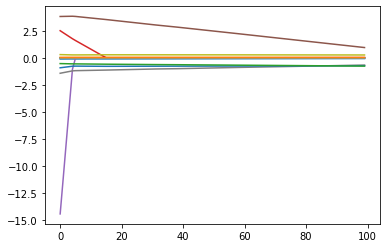

In [16]:
alphas = np.linspace(0.01,1,100)
coefs = []
for a in alphas:
    
    lasso = Lasso(alpha=a)
    lasso.fit(x,y)
    coefs.append(lasso.coef_)
    
plt.plot(coefs)
plt.show()

the figure above illustrate thr behaviour of lasso regularization we increase the alpha it is setting more and more coefficents to zero

#   hyperparameter tuning to find the best alpha (penalty term) for this data

In [19]:
x["CRIM1"]=np.square(x["CRIM"])
x["CRIM2"]=(x["CRIM"]**3)
x["CRIM4"]=(x["CRIM"]**4)

x["AGE1"]=np.square(x["AGE"])
x["AGE3"]=(x["AGE"]**3)
x["AGE4"]=(x["AGE"]**4)

In [26]:
alphas = np.linspace(0.1,1,100)

lasso_cv = LassoCV(alphas=alphas, cv=3, random_state=3)

lasso_cv.fit(x,y)

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5483.789943107773, tolerance: 2.905135560830861
  tol, rng, random, positive)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5467.101468474801, tolerance: 2.905135560830861
  tol, rng, random, positive)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5450.350557255859, tolerance: 2.905135560830861
  tol, rng, random, positive)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want t

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5373.859646820279, tolerance: 2.8375366587537094
  tol, rng, random, positive)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5307.070647867834, tolerance: 2.8375366587537094
  tol, rng, random, positive)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5209.088572615441, tolerance: 2.8375366587537094
  tol, rng, random, positive)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might wan

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5433.447502782834, tolerance: 2.7965138343195264
  tol, rng, random, positive)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5407.89316042615, tolerance: 2.7965138343195264
  tol, rng, random, positive)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5379.343361256513, tolerance: 2.7965138343195264
  tol, rng, random, positive)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want

LassoCV(alphas=array([0.1       , 0.10909091, 0.11818182, 0.12727273, 0.13636364,
       0.14545455, 0.15454545, 0.16363636, 0.17272727, 0.18181818,
       0.19090909, 0.2       , 0.20909091, 0.21818182, 0.22727273,
       0.23636364, 0.24545455, 0.25454545, 0.26363636, 0.27272727,
       0.28181818, 0.29090909, 0.3       , 0.30909091, 0.31818182,
       0.32727273, 0.33636364, 0.34545455, 0.35454545, 0.36363636,
       0.37272727, 0.381818...
       0.82727273, 0.83636364, 0.84545455, 0.85454545, 0.86363636,
       0.87272727, 0.88181818, 0.89090909, 0.9       , 0.90909091,
       0.91818182, 0.92727273, 0.93636364, 0.94545455, 0.95454545,
       0.96363636, 0.97272727, 0.98181818, 0.99090909, 1.        ]),
        copy_X=True, cv=3, eps=0.001, fit_intercept=True, max_iter=1000,
        n_alphas=100, n_jobs=None, normalize=False, positive=False,
        precompute='auto', random_state=3, selection='cyclic', tol=0.0001,
        verbose=False)

In [27]:
lasso_cv.alpha_

0.1090909090909091

In [28]:
lasso_cv.coef_

array([-2.11656616e-01,  4.02308972e-02, -6.07935408e-02,  8.53863825e-01,
       -0.00000000e+00,  3.74784827e+00,  2.56449227e-02, -1.14900333e+00,
        3.04828917e-01, -1.51659873e-02, -7.56675337e-01,  9.76651395e-03,
       -5.87078920e-01,  5.09063658e-03, -5.02113219e-05, -5.44937110e-09,
       -1.01969909e-03, -2.34578580e-06,  1.00556727e-07])

In [29]:
pd.DataFrame(lasso_cv.coef_,index=x.columns,columns=['coefs'])

,coefs
CRIM,-2.116566e-01
ZN,4.023090e-02
INDUS,-6.079354e-02
CHAS,8.538638e-01
NOX,-0.000000e+00
RM,3.747848e+00
AGE,2.564492e-02
DIS,-1.149003e+00
RAD,3.048289e-01
TAX,-1.516599e-02


# ridge regularization

In [33]:
from sklearn.datasets import load_boston
boston=load_boston()
bos=pd.DataFrame(boston.data,columns=boston.feature_names)
bos['price']=boston.target



In [40]:
bos=bos.sample(frac=1,random_state=3)
y=bos['price']
x=bos.drop(['price'],axis=1)

ridge_alphas = np.logspace(-2,-1,100)


ridge_cv = RidgeCV(alphas = ridge_alphas, store_cv_values=True)

ridge_cv.fit(x,y)










RidgeCV(alphas=array([0.01      , 0.01023531, 0.01047616, 0.01072267, 0.01097499,
       0.01123324, 0.01149757, 0.01176812, 0.01204504, 0.01232847,
       0.01261857, 0.0129155 , 0.01321941, 0.01353048, 0.01384886,
       0.01417474, 0.01450829, 0.01484968, 0.01519911, 0.01555676,
       0.01592283, 0.01629751, 0.01668101, 0.01707353, 0.01747528,
       0.0178865 , 0.01830738, 0.01873817, 0.0191791 , 0.01963041,
       0.02009...
       0.05722368, 0.05857021, 0.05994843, 0.06135907, 0.06280291,
       0.06428073, 0.06579332, 0.06734151, 0.06892612, 0.07054802,
       0.07220809, 0.07390722, 0.07564633, 0.07742637, 0.07924829,
       0.08111308, 0.08302176, 0.08497534, 0.0869749 , 0.08902151,
       0.09111628, 0.09326033, 0.09545485, 0.097701  , 0.1       ]),
        cv=None, fit_intercept=True, gcv_mode=None, normalize=False,
        scoring=None, store_cv_values=True)

In [39]:

ridge_cv.alpha_

0.03678379771828634

In [38]:
ridge_cv.coef_

array([-1.07805433e-01,  4.64781001e-02,  1.88138776e-02,  2.68045230e+00,
       -1.73526918e+01,  3.81310803e+00,  3.24037719e-04, -1.46946799e+00,
        3.05078019e-01, -1.23674079e-02, -9.48157516e-01,  9.33326990e-03,
       -5.25217160e-01])

In [37]:
pd.DataFrame(ridge_cv.coef_,index = x.columns,columns=['coefs'])

,coefs
CRIM,-0.107805
ZN,0.046478
INDUS,0.018814
CHAS,2.680452
NOX,-17.352692
RM,3.813108
AGE,0.000324
DIS,-1.469468
RAD,0.305078
TAX,-0.012367


In [36]:
ridge_cv.coef_

array([-1.07805433e-01,  4.64781001e-02,  1.88138776e-02,  2.68045230e+00,
       -1.73526918e+01,  3.81310803e+00,  3.24037719e-04, -1.46946799e+00,
        3.05078019e-01, -1.23674079e-02, -9.48157516e-01,  9.33326990e-03,
       -5.25217160e-01])

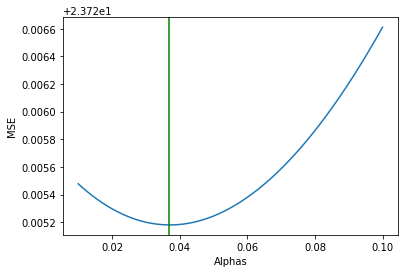

In [35]:
plt.plot(ridge_cv.alphas,ridge_cv.cv_values_.mean(0))
plt.axvline(ridge_cv.alpha_ , c='g')
plt.xlabel('Alphas')
plt.ylabel('MSE')
plt.show()

# ELASTIC NET REGULARIZATION

In [96]:
np.linspace(0.01,1,10)

array([0.01, 0.12, 0.23, 0.34, 0.45, 0.56, 0.67, 0.78, 0.89, 1.  ])

In [97]:
np.logspace(-2,0,10)

array([0.01      , 0.01668101, 0.02782559, 0.04641589, 0.07742637,
       0.12915497, 0.21544347, 0.35938137, 0.59948425, 1.        ])

In [98]:
alphas= np.logspace(-3,2,10)

en_cv = ElasticNetCV(alphas=alphas ,cv=3 , random_state=3)
en_cv.fit(x,y)

ValueError: could not convert string to float: 'yes'

In [99]:
en_cv.alpha_

AttributeError: 'ElasticNetCV' object has no attribute 'alpha_'

since optimal alpha is shify=ting the boundary at the lowest level, we can conclude that elastic net regularization is not required for this model

In [166]:
df = pd.read_csv('file:///C:/Users/dell/Downloads/Housing.csv')

In [167]:
df = df.sample(frac=1, random_state=3)

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 546 entries, 399 to 249
Data columns (total 13 columns):
Unnamed: 0    546 non-null int64
price         546 non-null float64
lotsize       546 non-null int64
bedrooms      546 non-null int64
bathrms       546 non-null int64
stories       546 non-null int64
driveway      546 non-null object
recroom       546 non-null object
fullbase      546 non-null object
gashw         546 non-null object
airco         546 non-null object
garagepl      546 non-null int64
prefarea      546 non-null object
dtypes: float64(1), int64(6), object(6)
memory usage: 59.7+ KB


In [169]:
df = df.drop('Unnamed: 0',axis=1)

In [170]:
df.describe()

,price,lotsize,bedrooms,bathrms,stories,garagepl
count,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000
mean,68121.597070,5150.265568,2.965201,1.285714,1.807692,0.692308
std,26702.670926,2168.158725,0.737388,0.502158,0.868203,0.861307
min,25000.000000,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,49125.000000,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,62000.000000,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,82000.000000,6360.000000,3.000000,2.000000,2.000000,1.000000
max,190000.000000,16200.000000,6.000000,4.000000,4.000000,3.000000


In [171]:
df

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
399,85000.0,7231,3,1,2,yes,yes,yes,no,yes,0,yes
251,52000.0,3520,2,2,1,yes,no,yes,no,no,0,no
455,75000.0,3800,3,1,2,yes,yes,yes,no,no,1,yes
466,54000.0,2856,3,1,3,yes,no,no,no,no,0,yes
129,127000.0,4600,3,2,2,yes,yes,no,no,yes,2,no
...,...,...,...,...,...,...,...,...,...,...,...,...
480,89500.0,6000,4,1,3,yes,yes,yes,no,no,0,yes
422,61100.0,3400,3,1,2,yes,no,yes,no,no,2,yes
119,116000.0,6840,5,1,2,yes,yes,yes,no,yes,1,no
256,71000.0,4410,4,3,2,yes,no,yes,no,no,2,no


In [172]:
obj_cols = list(df.select_dtypes(include='object').columns)

In [173]:
obj_cols

['driveway', 'recroom', 'fullbase', 'gashw', 'airco', 'prefarea']

In [174]:
for col in obj_cols:
    print(df[col].value_counts())
    print('\n')

yes    469
no      77
Name: driveway, dtype: int64


no     449
yes     97
Name: recroom, dtype: int64


no     355
yes    191
Name: fullbase, dtype: int64


no     521
yes     25
Name: gashw, dtype: int64


no     373
yes    173
Name: airco, dtype: int64


no     418
yes    128
Name: prefarea, dtype: int64




In [175]:
df = pd.get_dummies(df, columns=obj_cols, drop_first=True)

In [176]:
df.isnull().sum()*100/df.shape[1]

price           0.0
lotsize         0.0
bedrooms        0.0
bathrms         0.0
stories         0.0
garagepl        0.0
driveway_yes    0.0
recroom_yes     0.0
fullbase_yes    0.0
gashw_yes       0.0
airco_yes       0.0
prefarea_yes    0.0
dtype: float64

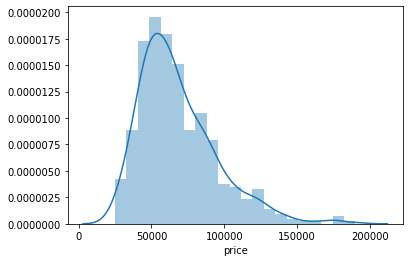

In [177]:
sns.distplot(df.price)

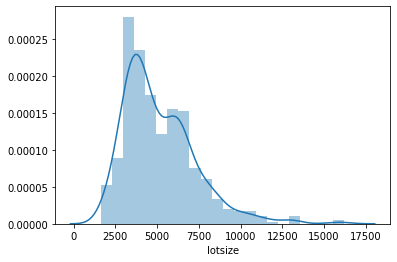

In [178]:
sns.distplot(df.lotsize)
plt.show()

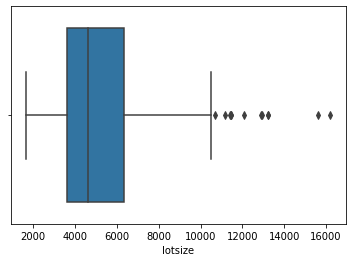

In [179]:
sns.boxplot(df.lotsize)

# stats model to predict price

In [180]:
import statsmodels.api as sm

y = df.price
x = df.drop('price',axis=1)
xc = sm.add_constant(x)

C:\Users\dell\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [181]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

pd.DataFrame([vif(xc.values,i) for i in range(xc.shape[1])], index=xc.columns,columns=['vif'])

,vif
const,26.682009
lotsize,1.321632
bedrooms,1.365633
bathrms,1.282494
stories,1.478584
garagepl,1.200839
driveway_yes,1.163091
recroom_yes,1.210501
fullbase_yes,1.316543
gashw_yes,1.038246


In [182]:
model = sm.OLS(y,xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     99.97
Date:                Thu, 12 Mar 2020   Prob (F-statistic):          6.18e-122
Time:                        15:05:17   Log-Likelihood:                -6034.1
No. Observations:                 546   AIC:                         1.209e+04
Df Residuals:                     534   BIC:                         1.214e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -4038.3504   3409.471     -1.184      0.237   -1.07e+04    2659.271
lotsize          3.5463      0.350     10.124      0.000       2.858       4.234
bedrooms      1832.0035   1047.000      1.750      0.081    -224.741    3888.748
bathrms       1.434e+04   1489.921      9.622      0.000    1.14e+04    1.73e+04
stories       6556.9457    925.290      7.086      0.000    4739.291    8374.600
garagepl      4244.8290    840.544      5.050      0.000    2593.650    5896.008
driveway_yes  6687.7789   2045.246      3.270      0.001    2670.065    1.07e+04
recroom_yes   4511.2838   1899.958      2.374      0.018     778.976    8243.592
fullbase_yes  5452.3855   1588.024      3.433      0.001    2332.845    8571.926
gashw_yes     1.283e+04   3217.597      3.988      0.000    6510.706    1.92e+04
airco_yes     1.263e+04   1555.021      8.124      0.000    9578.182    1.57e+04
prefarea_yes  9369.5132   1669.091      5.614      0.000    6090.724    1.26e+04
==============================================================================
Omnibus:                       93.454   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              247.620
Skew:                           0.853   Prob(JB):                     1.70e-54
Kurtosis:                       5.824   Cond. No.                     3.07e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.07e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# normality of residuals

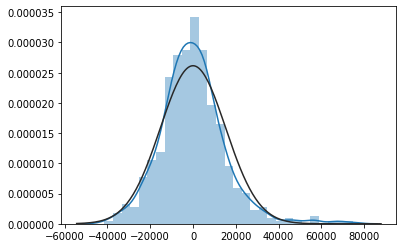

In [183]:
from scipy.stats import norm
fit = norm
sns.distplot(model.resid,fit=fit)

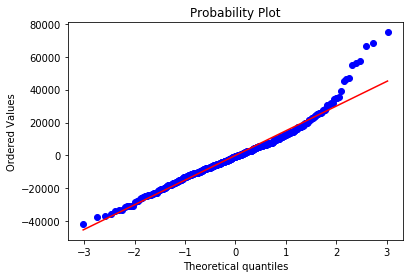

In [184]:
import scipy.stats as st
st.probplot(model.resid, plot = plt)
plt.show()

In [185]:
#h0 data is normal 
#h1 data is not normal

st.jarque_bera(model.resid)

(247.61979372009125, 0.0)

jb test indicates that are not normal // if alpha value is less than p value reject null h0

In [186]:
ly = np.log(y)

In [187]:
model = sm.OLS(ly,xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     101.6
Date:                Thu, 12 Mar 2020   Prob (F-statistic):          3.67e-123
Time:                        15:05:20   Log-Likelihood:                 73.873
No. Observations:                 546   AIC:                            -123.7
Df Residuals:                     534   BIC:                            -72.11
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           10.0256      0.047    212.210      0.000       9.933      10.118
lotsize       5.057e-05   4.85e-06     10.418      0.000     4.1e-05    6.01e-05
bedrooms         0.0340      0.015      2.345      0.019       0.006       0.063
bathrms          0.1678      0.021      8.126      0.000       0.127       0.208
stories          0.0923      0.013      7.197      0.000       0.067       0.117
garagepl         0.0508      0.012      4.358      0.000       0.028       0.074
driveway_yes     0.1307      0.028      4.610      0.000       0.075       0.186
recroom_yes      0.0735      0.026      2.792      0.005       0.022       0.125
fullbase_yes     0.0994      0.022      4.517      0.000       0.056       0.143
gashw_yes        0.1784      0.045      4.000      0.000       0.091       0.266
airco_yes        0.1780      0.022      8.262      0.000       0.136       0.220
prefarea_yes     0.1271      0.023      5.496      0.000       0.082       0.173
==============================================================================
Omnibus:                        7.621   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                8.443
Skew:                          -0.199   Prob(JB):                       0.0147
Kurtosis:                       3.461   Cond. No.                     3.07e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.07e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [188]:
st.jarque_bera(model.resid)

(8.443241215419079, 0.014674843059909293)

# test homoscedasticity

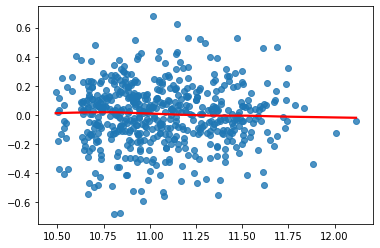

In [190]:
y_pred=model.predict(xc)

sns.regplot(x=y_pred, y=model.resid, lowess=True, line_kws={'color':'red'})
plt.show()

In [191]:
#not showing any serious change in pattern.


#H0: Residual varience is constant
#H1: residual varience is not constant

import statsmodels.stats.api as sms
sms.het_goldfeldquandt(y=model.resid, x=xc)

(0.8243417719616921, 0.9403450681334398, 'increasing')

### Prob=0.9357727109130592 suggests that residual varience is constant

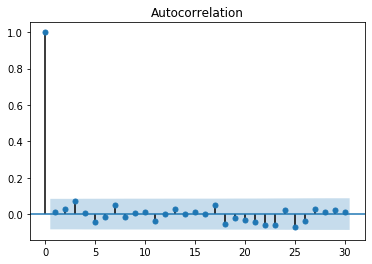

In [192]:
import statsmodels.tsa.api as smt
acf=smt.graphics.plot_acf(model.resid, lags=30)

### DW= 1.96 indicated that there is no autocorrelation

  # test of lr

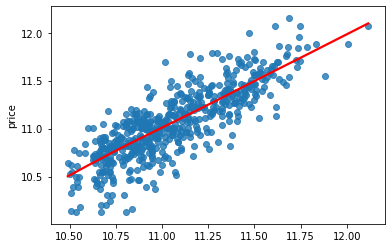

In [193]:
sns.regplot(x=y_pred, y=ly, lowess=True, line_kws={'color': 'red'})
plt.show()

In [194]:
import statsmodels.api as sm

sm.stats.diagnostic.linear_rainbow(res=model, )

(1.1286339110460553, 0.1621147470057974)

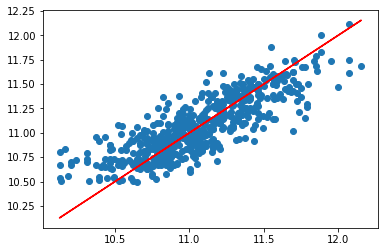

In [197]:
plt.scatter(ly,y_pred)
plt.plot(ly,ly,'r')